In [38]:
import pandas as pd
import numpy as np

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [61]:
i = pd.read_csv("/Users/shreyasurana/Desktop/iris.csv")

In [62]:
i.head(5)

,s_l,s_w,p_l,p_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
from ggplot import *

In [35]:
a=ggplot(i, aes(x='s_l', y='s_w')) + geom_point(color='blue', shape=4, size=40)
b=ggplot(i, aes(x='s_l', y='p_l')) + geom_point(color='blue', shape=4, size=40)
c=ggplot(i, aes(x='s_l', y='p_w')) + geom_point(color='blue', shape=4, size=40)
d=ggplot(i, aes(x='s_w', y='p_l')) + geom_point(color='blue', shape=4, size=40)
e=ggplot(i, aes(x='s_w', y='p_w')) + geom_point(color='blue', shape=4, size=40);
f=ggplot(i, aes(x='p_l', y='p_w')) + geom_point(color='blue', shape=4, size=40)

In [80]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [81]:
km= KMeans(n_clusters=3)

In [82]:
km.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [72]:
i["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [79]:
i["class"]=i["class"].map({"Iris-setosa" : 7,"Iris-versicolor" : 8 , "Iris-virginica" : 9})

In [83]:
list(i)

['s_l', 's_w', 'p_l', 'p_w', 'class']

In [84]:
i.head()

,s_l,s_w,p_l,p_w,class
0,5.1,3.5,1.4,0.2,7
1,4.9,3.0,1.4,0.2,7
2,4.7,3.2,1.3,0.2,7
3,4.6,3.1,1.5,0.2,7
4,5.0,3.6,1.4,0.2,7


In [109]:
train, test = train_test_split(i, test_size=0.2)
train.drop("class", axis=1, inplace=True)

/Users/shreyasurana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
km.fit(train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [111]:
test.drop("class", axis=1,inplace=True)

/Users/shreyasurana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
test["y_pred"]= km.predict(test)

/Users/shreyasurana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
test.head()

,s_l,s_w,p_l,p_w,y_pred
136,6.3,3.4,5.6,2.4,2
14,5.8,4.0,1.2,0.2,1
146,6.3,2.5,5.0,1.9,0
73,6.1,2.8,4.7,1.2,0
1,4.9,3.0,1.4,0.2,1


Text(0.5,1,'K Mean Classification')

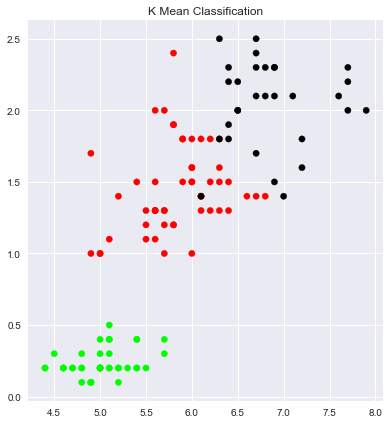

In [127]:
plt.figure(figsize=(14,7))
 
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(train.s_l, train.p_w, c=colormap[km.labels_], s=40)
plt.title('K Mean Classification')

Text(0.5,1,'K Mean Classification')

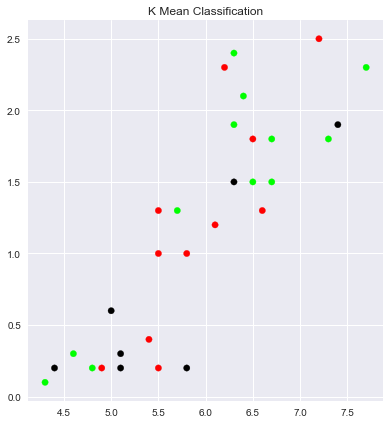

In [121]:
plt.figure(figsize=(14,7))
 
colormap = np.array(['red', 'lime', 'black'])
 
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(test.s_l, test.p_w, c=colormap[km.labels_], s=40)
plt.title('K Mean Classification')

In [122]:
from sklearn.metrics import accuracy_score

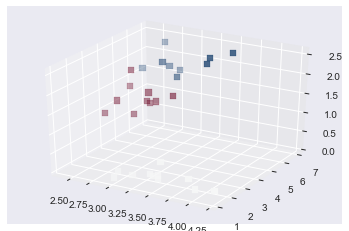

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(test['s_w'])
y = np.array(test['p_l'])
z = np.array(test['p_w'])
ax.scatter(x,y,z, marker="s", c=test["y_pred"], s=40, cmap="RdBu")
plt.show()

In [136]:
km.fit(i)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [137]:
i["y_pred"]= km.predict(i)

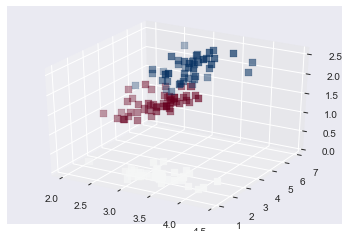

In [140]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(i['s_w'])
y = np.array(i['p_l'])
z = np.array(i['p_w'])
ax.scatter(x,y,z, marker="s", c=i["y_pred"], s=50, cmap="RdBu")
plt.show()